# Forward Kinematics and DH Parameters with 3-Link Arm


This notebook demonstrates how the Denavit-Hartenberg (DH) parameters are used to compute forward kinematics for a 3-link robotic arm.
We'll also visualize the arm and its joints with coordinate frames.


## 1. Import Necessary Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


## 2. Define Functions for DH Transform and Forward Kinematics

In [ ]:
# DH parameter function
def dh_transform(theta, d, a, alpha):
    return np.array([[np.cos(theta), -np.sin(theta)*np.cos(alpha), np.sin(theta)*np.sin(alpha), a*np.cos(theta)],
                     [np.sin(theta), np.cos(theta)*np.cos(alpha), -np.cos(theta)*np.sin(alpha), a*np.sin(theta)],
                     [0, np.sin(alpha), np.cos(alpha), d],
                     [0, 0, 0, 1]])

# Forward kinematics function
def forward_kinematics(dh_params):
    T = np.eye(4)

    for param in dh_params:
        theta, d, a, alpha = param
        T = np.dot(T, dh_transform(theta, d, a, alpha))
    return T


## 3. Visualization of 3-Link Arm with Coordinate Frames

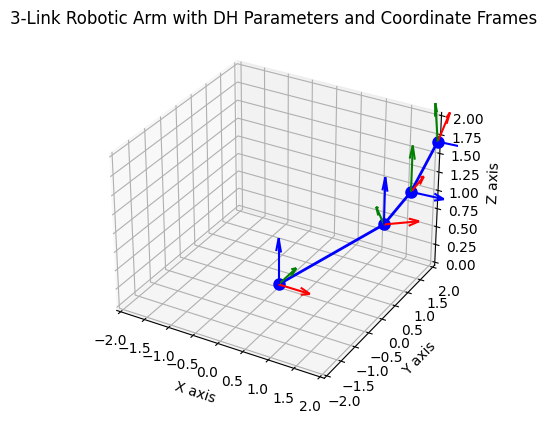

In [ ]:

# Visualization function for 3-link arm with coordinate frames
def plot_3d_arm_with_frames(dh_params):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Base of the arm
    points = np.array([[0, 0, 0]])
    current_T = np.eye(4)

    # Draw the origin frame
    draw_coordinate_frame(ax, np.eye(4), scale=0.8)

    # Add joints and frames
    for param in dh_params:
        current_T = np.dot(current_T, dh_transform(*param))
        new_point = current_T[:3, 3]  # Extract the translation part
        points = np.vstack((points, new_point))
        draw_coordinate_frame(ax, current_T, scale=0.8)

    # Plotting the arm
    ax.plot(points[:, 0], points[:, 1], points[:, 2], '-o', lw=2, markersize=8, color='b')

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('3-Link Robotic Arm with DH Parameters and Coordinate Frames')

    # Set axis limits
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([0, 2])

    plt.show()

def draw_coordinate_frame(ax, T, scale=0.1):
    origin = T[:3, 3]
    x_axis = T[:3, 0] * scale
    y_axis = T[:3, 1] * scale
    z_axis = T[:3, 2] * scale

    ax.quiver(*origin, *x_axis, color='r', length=scale)
    ax.quiver(*origin, *y_axis, color='g', length=scale)
    ax.quiver(*origin, *z_axis, color='b', length=scale)

# DH parameters for the 3-link arm [theta, d, a, alpha]
dh_params_3link = [
        [np.deg2rad(40), 0.7, 1.9, np.deg2rad(0)],
        [np.deg2rad(55), 0.0, 1.3, np.deg2rad(90)],
        [np.deg2rad(20), 0.1, 1.1, np.deg2rad(0)]
    ]

# Visualize the 3-link arm with coordinate frames
plot_3d_arm_with_frames(dh_params_3link)


In [ ]:

for i, param in enumerate(dh_params_3link):
  print(i, param)

0 [0.6981317007977318, 0.7, 1.9, 0.0]
1 [0.9599310885968813, 0.0, 1.3, 1.5707963267948966]
2 [0.3490658503988659, 0.1, 1.1, 0.0]


## 4. End-Effector Pose

In [ ]:

# Forward kinematics for the 3-link arm
end_effector_pose = forward_kinematics(dh_params_3link)
print("End-Effector Pose:\n", end_effector_pose)

end_effector_pos = end_effector_pose[:3, 3]
print("End-Effector Position:\n", end_effector_pos)

end_effectior_rot = end_effector_pose[:3, :3]
print("End-Effector Rotation Matrix:\n")
print(end_effectior_rot)

End-Effector Pose:
 [[-8.18996083e-02  2.98090196e-02  9.96194698e-01  1.35171188e+00]
 [ 9.36116807e-01 -3.40718653e-01  8.71557427e-02  3.55479363e+00]
 [ 3.42020143e-01  9.39692621e-01  6.12323400e-17  1.07622216e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
End-Effector Position:
 [1.35171188 3.55479363 1.07622216]
End-Effector Rotation Matrix:

[[-8.18996083e-02  2.98090196e-02  9.96194698e-01]
 [ 9.36116807e-01 -3.40718653e-01  8.71557427e-02]
 [ 3.42020143e-01  9.39692621e-01  6.12323400e-17]]
